# Домашнее задание к лекции "Базовые понятия статистики"

## Обязательная часть

Будем осуществлять работу с непростым [набором данных](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv) о состоянии здоровья лошадей, испытывающих кишечные колики. 





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

url="https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv"
data=pd.read_csv(url, names=['surgery','age','Hospital Number','rectal temperature','pulse',\
                             'respiratory rate','temperature of extremities','peripheral pulse',\
                             'mucous membranes','capillary refill time','pain level','peristalsis',\
                             'abdominal distension','nasogastric tube','nasogastric reflux',\
                             'nasogastric reflux PH','rectal examination - feces','abdomen','packed cell volume',\
                             'total protein','abdominocentesis appearance','abdomcentesis total protein',\
                             'outcome','surgical lesion','site of lesion','type','subtype','specific code'])
data.head()

,surgery,age,Hospital Number,rectal temperature,pulse,respiratory rate,temperature of extremities,peripheral pulse,mucous membranes,capillary refill time,...,packed cell volume,total protein,abdominocentesis appearance,abdomcentesis total protein,outcome,surgical lesion,site of lesion,type,subtype,specific code
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,...,74.00,7.40,?,?,2,2,4300,0,0,2


### Задание 1. Базовое изучение

Изучить представленный набор данных на основе [описания его столбцов](https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.names) и выбрать 8 столбцов для дальнейшего изучения (среди них должны быть как числовые, так и категориальные). Провести расчет базовых метрик для них, кратко описать результаты.

> Возьмем в работу столбцы: "операция", "возраст", "ректальная температура", "пульс", "частота дыхания", "температура конечностей", "уровень боли", "результат"<br>

> Также в поле age присутствует ошибка, т.к. возможны 2 значения: 1 и 2, а здесь мы видим 1 и 9

In [2]:
values = ['surgery', 'age', 'rectal temperature', 'pulse', 'respiratory rate', 'temperature of extremities',\
           'pain level', 'outcome']

data = data[values].replace({'?': np.nan}) # Убираем некорректные символы

data['age'] = data['age'].replace({9: 2}) # заменим 9 на 2

data.head()

,surgery,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain level,outcome
0,2,1,38.50,66,28,3,5,2
1,1,1,39.2,88,20,NaN,3,3
2,2,1,38.30,40,24,1,3,1
3,1,2,39.10,164,84,4,2,2
4,2,1,37.30,104,35,NaN,NaN,2


In [3]:
# Приведем все данные к нужным нам форматам

for x in data.columns:
    data[x] = pd.to_numeric(data[x])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery                     299 non-null    float64
 1   age                         300 non-null    int64  
 2   rectal temperature          240 non-null    float64
 3   pulse                       276 non-null    float64
 4   respiratory rate            242 non-null    float64
 5   temperature of extremities  244 non-null    float64
 6   pain level                  245 non-null    float64
 7   outcome                     299 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.9 KB


In [4]:
# Проведем расчеты базовых метрик

out = pd.DataFrame({'Параметр': values})

out.insert(1, "Среднее", data.apply(lambda x: round(x.mean(), 3)).values)
out.insert(2, "Медиана", data.apply(lambda x: round(x.median(), 3)).values)
out.insert(3, "Мода", data.apply(lambda x: round(x.mode()[0], 3)).values)
out.insert(4, "Минимум", data.apply(lambda x: round(min(x), 3)).values)
out.insert(5, "Максимум", data.apply(lambda x: round(max(x), 3)).values)
out.insert(6, "Сред.отклонение", data.apply(lambda x: round(x.std(), 3)).values)
out.insert(7, "Размах", data.apply(lambda x: round(max(x)-min(x), 3)).values)

out

,Параметр,Среднее,Медиана,Мода,Минимум,Максимум,Сред.отклонение,Размах
0,surgery,1.398,1.0,1.0,1.0,2.0,0.490,1.0
1,age,1.080,1.0,1.0,1.0,2.0,0.272,1.0
2,rectal temperature,38.168,38.2,38.0,35.4,40.8,0.732,5.4
3,pulse,71.913,64.0,48.0,30.0,184.0,28.631,154.0
4,respiratory rate,30.417,24.5,20.0,8.0,96.0,17.642,88.0
5,temperature of extremities,2.348,3.0,3.0,1.0,4.0,1.045,3.0
6,pain level,2.951,3.0,3.0,1.0,5.0,1.308,4.0
7,outcome,1.552,1.0,1.0,1.0,3.0,0.737,2.0


> #### Как можно увидеть в части полей есть незаполненные поля, что не дает корректно сосчитать все базовые метрики.
Из полученного результата можно сделать следующие выводы:
- Большенству лошадей операцию не делали
- Большенство лошадей старше 6 месяцев
- Большинство лошадей имеет температуру 38 градусов, хотя нормальная считается чуть меньше - 37,8
- При том, что нормальный пульс у лошадей 30-40 уд/мин, то по этим данным пульс у большинства лошадей = 48 уд/мин.  Также наблюдается очень большая разница в частоте пульса - от 30 до 184, что значительно влияет на медиану и среднее значение. 
- Частота дыхания, также как и пульс имеет достаточно большой размах при том, что наиболее часто равно 20, норма - от 8 до 10
- Температура конечностей чаще всего = 3, т.е. прохладная
- Уровень боли чаще всего = 3,  т.е. периодическая, легкая боль
- Результат большенства обследуемх лошадей = 1, т.е. они живы

### Задание 2. Работа с выбросами

В выбранных числовых столбцах найти выбросы, выдвинуть гипотезы об их причинах и проинтерпретировать результаты. Принять и обосновать решение о дальнейшей работе с ними.


In [5]:
# Расчитаем нижнюю и верхнюю границу межквартильного размаха и вернем кол-во значений попадающих в них

def quart(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr) 
    higher = q3 + (1.5 * iqr)
    outliers = data[~x.between(lower, higher)]
    return len(outliers)

out2 = pd.DataFrame({'Параметр': values})
out2.insert(1, "Выбросы", data.apply(quart).values)
out2

,Параметр,Выбросы
0,surgery,1
1,age,24
2,rectal temperature,74
3,pulse,29
4,respiratory rate,75
5,temperature of extremities,56
6,pain level,55
7,outcome,1


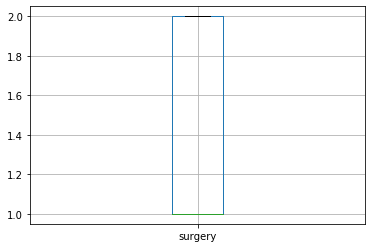

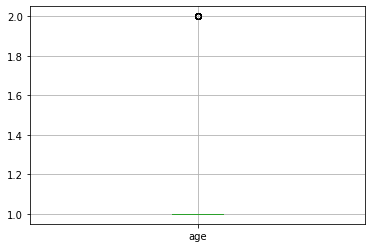

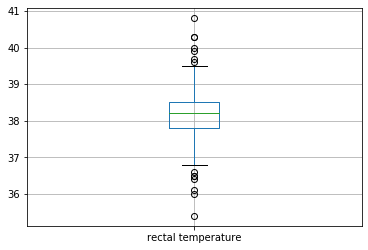

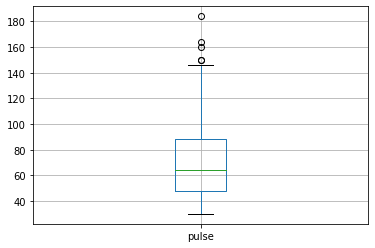

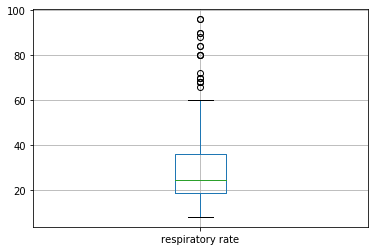

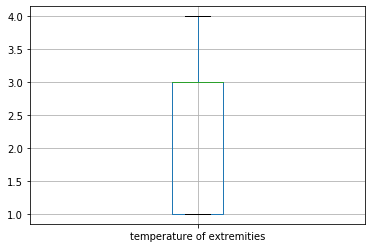

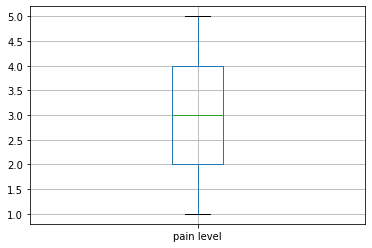

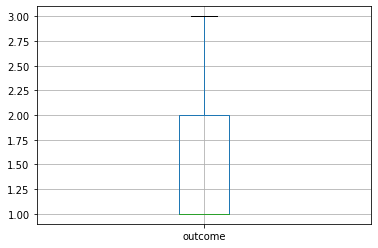

In [6]:
# Построим график boxplot для каждого параметра, чтобы визуально увидеть выбросы

for x in data.columns:
    data[x].plot(kind='box')
    plt.grid()
    plt.show()

> Если сравнить данные таблицы и визуальные данные на графиках, то нет выбросов у surgery, temperature of extremities,
 pain level, outcome, что наводит на мысль, что выбросы могут быть посчитаны некорректно. Повторим поиск выбросов, 
 но только сейчас выведим их сами на экран, например для параметра 'pain level':

In [7]:
# Функция для отображения выбросов

def quart(x, field):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr) 
    higher = q3 + (1.5 * iqr)
    outliers = data[[field]][~x.between(lower, higher)]
    return outliers[field]

out2 = data[['pain level']].apply(quart, field='pain level')
out2.head()

,pain level
4,NaN
7,NaN
17,NaN
19,NaN
24,NaN


> Получается, что NaN может считаться как выброс. При проверки других параметров также получаем NaN, соотвтественно 
 мы можем предположить, что именно пропуски с NaN дают такое большое кол-во выборосов и действильных выбросов было бы
 меньше, если убрать пропуски.
 
> Теперь проверим выбросы не зависящие от NaN: age, rectal temperature, pulse, respiratory rate

In [8]:
# Начнем с age:

data[['age']].apply(quart, field='age').groupby('age').size().reset_index(name='counts')

,age,counts
0,2,24


> Как можно увидеть выше, что цифра 2 была засчитана за выброс (младше 6 мес.), что не правильно, поэтому мы оставляем 
 как есть.

> Теперь проверим rectal temperature и округлим значения для визуального упрощения

> Из описания rectal temperature:
  - Нормальная температура 37,8, снижение температуры при шоке, повышенная температура может возникнуть из-за инфекции
  - Параметр обычно меняется по мере развития проблемы:
  Пример: может начаться нормально, а затем повыситься из-за воспаления, возвращаясь в нормальный диапазон, из-за шока

Кол-во NaN = [60] 

   rectal temperature  counts
0                35.0       1
1                36.0       5
2                37.0       1
3                40.0       6
4                41.0       1

Кол-во лошадей с повышенной температурой:  167


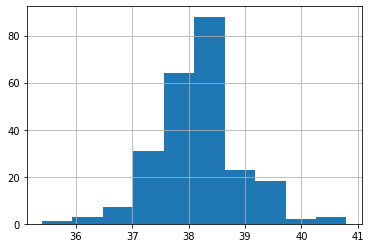

In [9]:
data_rt = data[['rectal temperature']].apply(quart, field='rectal temperature')
print("Кол-во NaN =", data_rt.isna().sum().values,"\n")
print(round(data_rt).groupby('rectal temperature').size().reset_index(name='counts'))
print("\nКол-во лошадей с повышенной температурой: ",len(data[data['rectal temperature']>37.8]))

data['rectal temperature'].hist()

> Как можно видеть выше, выбросов по температуре немного и они происходят по естественным причинам у больных лошадей. 
 Также больные лошади могут и не иметь повышеную температуру из-за шока, поэтому удаление этих выбросов нам ничего 
 не даст и мы все выбросы оставляем как есть.
 Больше проблему представляют пропуски NaN (60 штук) и с ними нужно будет работать.

> Теперь посмотрим поле pulse
 Из описания: 30-40 ударов в минуту - нормально для взрослых лошадей
 У спортивных лошадей может быть 20-25
 Животные с болезненными поражениями или страдающие от шока кровообращения может иметь повышенный пульс

Кол-во NaN = [24] 

   pulse  counts
0  150.0       2
1  160.0       1
2  164.0       1
3  184.0       1

Кол-во лошадей с повышенным пульсом:  252


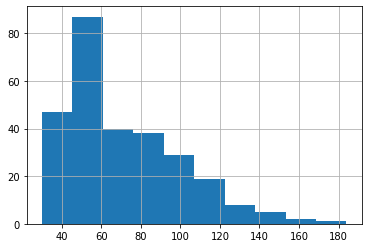

In [10]:
data_p = data[['pulse']].apply(quart, field='pulse')
print("Кол-во NaN =", data_p.isna().sum().values,"\n")
print(round(data_p).groupby('pulse').size().reset_index(name='counts'))
print("\nКол-во лошадей с повышенным пульсом: ",len(data[data['pulse']>40]))

data['pulse'].hist()

> Как мы можем видеть, многие лошади в нашей выборке имеют повышенный пульс, что может говорить о их болезненном
 состоянии. Мы не можем просто удалить или заменить данные которые посчитаны выбросами, т.к. выбросы имеют естественную
 причину и являются просто очень высокий пульс. Оставляем эти данные как есть.

> Теперь рассмотрим поле respiratory rate
 Описание: нормальная оценка от 8 до 10 - полезность сомнительна из-за больших колебаний.

Кол-во NaN = [58] 

   respiratory rate  counts
0              66.0       1
1              68.0       3
2              70.0       2
3              72.0       1
4              80.0       3
5              84.0       2
6              88.0       1
7              90.0       2
8              96.0       2

Кол-во лошадей с учащенным дыханием:  236


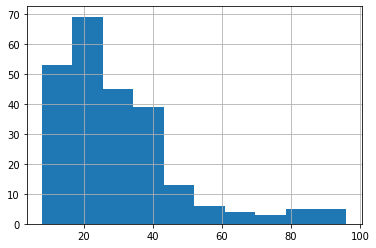

In [11]:
data_p = data[['respiratory rate']].apply(quart, field='respiratory rate')
print("Кол-во NaN =",data_p.isna().sum().values,"\n")
print(round(data_p).groupby('respiratory rate').size().reset_index(name='counts'))
print("\nКол-во лошадей с учащенным дыханием: ",len(data[data['respiratory rate']>10]))

data['respiratory rate'].hist()

> Выбросы у частотя дыхания имеют естественную природу, хоть и присутствуют очень большие колебания.
 Удаление их нецелесообразно и мы их оставляем.
 В данном случае также большая проблема с NaN.

> Как итог, мы можем сказать, что все выбросы в наших данных имеют естественную причину и мы их оставляем.
 Большенство параметров выходит за рамки нормы, поэтому мы предполагаем, что многие лошади в нашей выборке могут болеют.


### Задание 3. Работа с пропусками

Рассчитать количество пропусков для всех выбранных столбцов. Принять и обосновать решение о методе работы с пропусками по каждому столбцу, сформировать датафрейм, в котором пропуски будут отсутствовать.

In [12]:
#Посчитаем кол-во пропусков в каждом из стоблцов

def empty(x):
    res = x.isnull().sum()
    return res

out3 = pd.DataFrame({'Параметр': values})
out3.insert(1, "Пропуски", data.apply(empty).values)
out3

,Параметр,Пропуски
0,surgery,1
1,age,0
2,rectal temperature,60
3,pulse,24
4,respiratory rate,58
5,temperature of extremities,56
6,pain level,55
7,outcome,1


> По этой выборке можно увидеть, что пропуски (NaN) во многом совпадают c кол-вом выбросов.<br>
> Единственное у параметра age отсутствуют пропуски и как мы видили выше за выбос бы принят age=2

In [13]:
print('Кол-во age=2:',len(data[data['age']==2]))

Кол-во age=2: 24


> Далее возьмем остальные 7 параметров в которых обнаружены пропуски и будем работать с ними.<br>

In [14]:
# Покажем в процентном отношении кол-во пропусков и выведем кол-во строк.

for x in data.columns:
    missing = data[x].isnull().mean()
    print(f'{x}: {missing :.1%}')
print('Кол-во строк:',len(data))  

surgery: 0.3%
age: 0.0%
rectal temperature: 20.0%
pulse: 8.0%
respiratory rate: 19.3%
temperature of extremities: 18.7%
pain level: 18.3%
outcome: 0.3%
Кол-во строк: 300


In [15]:
# Т.к. пустых значений в surgery и outcome незначительно, то просто удалим эти строки

data3 = data.dropna(subset=['surgery','outcome'])
print('Кол-во строк:',len(data3))

Кол-во строк: 299


In [16]:
# Добавим фукцию для вывода основных параметров для каждого поля

def params(x, title=''):
    print(x.name,title)
    print('Среднее:',round(x.mean(),3))
    print('Медиана:',round(x.median(),3))
    print('Мода:',round(x.mode(),3)[0])
    print('Сред.отклонение',round(x.std(),3),"\n")

> Возьмем параметр rectal temperature. Как мы видели выше, у более половины лошадей он больше нормы.<br>
Построим графики, чтобы понять с каким из параметров (была ли операция, возраст, результат) он может быть наиболее связан.

In [17]:
# Напишем функцию для построения графиков для этих параметров

def make_graph(dt, parametr):
    other_params = ['surgery','age','outcome'];
    for op in other_params:   
        plt.scatter(dt[op],dt[parametr])
        plt.ylabel(parametr)
        plt.xlabel(op)
        plt.grid()
        plt.show()

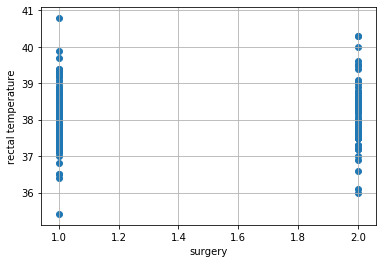

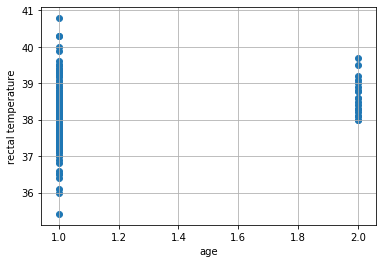

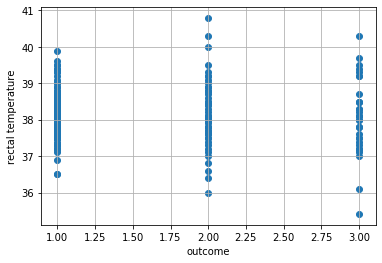

In [18]:
# Выведем графики для параметра rectal temperature

make_graph(data, 'rectal temperature')

> Как видно из графиков, температура более молодых лошадей ближе к норме, чем температура более возрастных (age). На основании этого мы можем сгруппировать данные по возрасту и заполнить пропуски отдельными данными для каждой возрастной группы.<br>
> Медиана, мода и среднее значение у rectal temperature практически равны, среднее отклонение незначительно, а сам показатель является непрерывным, поэтому заменяем пропуски средне.арифмитическим значением.

In [19]:
data3['rectal temperature'].fillna(data.groupby('age')['rectal temperature'].transform('mean'), inplace=True)

params(data['rectal temperature'], 'было')
params(data3['rectal temperature'], 'стало')

# Как можно увидеть, параметры значительно не изменились, значит двигаемся дальше

rectal temperature было
Среднее: 38.168
Медиана: 38.2
Мода: 38.0
Сред.отклонение 0.732 

rectal temperature стало
Среднее: 38.167
Медиана: 38.125
Мода: 38.125
Сред.отклонение 0.658 



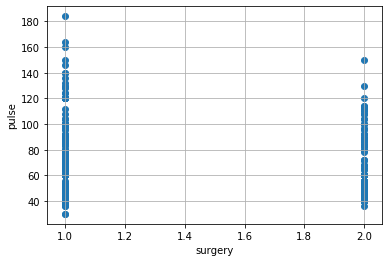

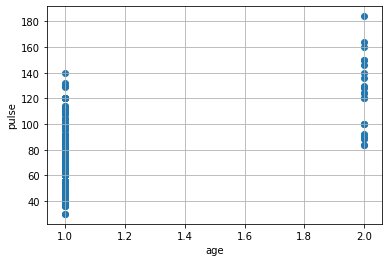

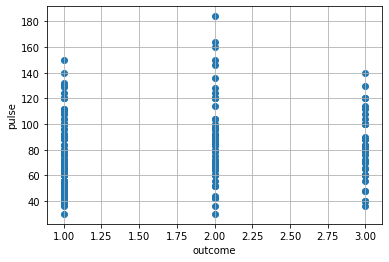

In [20]:
# Выведем графики для параметра pulse

make_graph(data, 'pulse')

> Из графиков выше видна разница в пульсе по возрасту лошадей (у молодых выше), поэтому так и разобьем даннные
 Для pulse размах достаточно велик, а также разница между средним, медианой и модой, поэтому заполним пропуски медианой

In [21]:
data3['pulse'].fillna(data.groupby('age')['pulse'].transform('median'), inplace=True)

params(data['pulse'], 'было')
params(data3['pulse'], 'стало')

# Кроме моды значения сильно не изменились поэтому переходим к следюущему параметру

pulse было
Среднее: 71.913
Медиана: 64.0
Мода: 48.0
Сред.отклонение 28.631 

pulse стало
Среднее: 71.465
Медиана: 60.0
Мода: 60.0
Сред.отклонение 27.982 



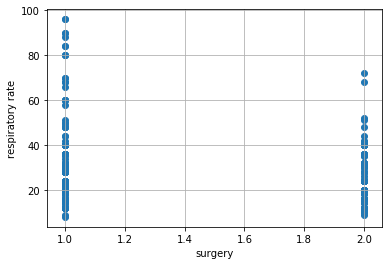

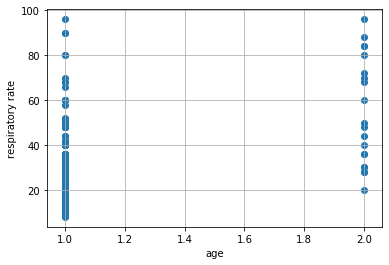

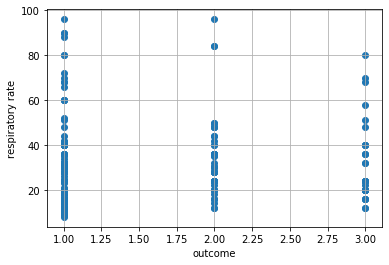

In [22]:
# Выведем графики для respiratory rate

make_graph(data, 'respiratory rate')

> Для respiratory rate также как и для предыдущего параметра достаточно большой размах, а также в описании сказано, что
 полезность этого параметра сомнительна из-за больших колебаний, поэтому здесь также заменим медианой.<br>
 Данные попробуем разбить по параметру surgery, визуально имеющим болшие различия между собой и показывающим, что
 частота дыхания больше у тех лошадей, которым делали операцию

In [23]:
data3['respiratory rate'].fillna(data.groupby('surgery')['respiratory rate'].transform('median'), inplace=True)

params(data['respiratory rate'], 'было')
params(data3['respiratory rate'], 'стало')

# Как видим изменились все значения среднее значение - незначительно и более сильно медиана, мода и среднее отклонение,
# но приняв во внимание большое кол-во колебаний в изначальных данных оставляем так как есть

respiratory rate было
Среднее: 30.417
Медиана: 24.5
Мода: 20.0
Сред.отклонение 17.642 

respiratory rate стало
Среднее: 29.689
Медиана: 28.0
Мода: 24.0
Сред.отклонение 15.955 



In [24]:
# temperature of extremities - имеет фиксированные значения и небольшие средние отклонения. Для замены возьмем моду
# По аналогии с rectal temperature разобьем данные по возрасту лошадей

data3['temperature of extremities'].fillna(data.groupby('age')['temperature of extremities'].transform('mean'),\
                                           inplace=True)

params(data['temperature of extremities'], 'было')
params(data3['temperature of extremities'], 'стало')

# Как видно значения сильно не изменились и поэтому переходим далее

temperature of extremities было
Среднее: 2.348
Медиана: 3.0
Мода: 3.0
Сред.отклонение 1.045 

temperature of extremities стало
Среднее: 2.343
Медиана: 2.364
Мода: 3.0
Сред.отклонение 0.944 



In [25]:
# pain level - также имеет фиксированные значения и небольшие отклонения и для замены возьмем моду
# В данном случае предположим, что уровень боли влияет на этот парамер и попробуем разбить по лошадям 
# у которых была или не было опреации

data3['pain level'].fillna(data.groupby('surgery')['pain level'].transform('mean'),inplace=True)

params(data['pain level'], 'было')
params(data3['pain level'], 'стало')

# Здесь также значения не сильно отличаются

pain level было
Среднее: 2.951
Медиана: 3.0
Мода: 3.0
Сред.отклонение 1.308 

pain level стало
Среднее: 2.96
Медиана: 3.0
Мода: 3.0
Сред.отклонение 1.194 



In [26]:
# В итоге мы заполнили все пустые значения и теперь выведем получившихся датафрейм
data3

,surgery,age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain level,outcome
0,2.0,1,38.500000,66.0,28.0,3.000000,5.000000,2.0
1,1.0,1,39.200000,88.0,20.0,2.364035,3.000000,3.0
2,2.0,1,38.300000,40.0,24.0,1.000000,3.000000,1.0
3,1.0,2,39.100000,164.0,84.0,4.000000,2.000000,2.0
4,2.0,1,37.300000,104.0,35.0,2.364035,2.455446,2.0
...,...,...,...,...,...,...,...,...
295,1.0,1,38.124545,120.0,70.0,4.000000,2.000000,3.0
296,2.0,1,37.200000,72.0,24.0,3.000000,4.000000,3.0
297,1.0,1,37.500000,72.0,30.0,4.000000,4.000000,2.0
298,1.0,1,36.500000,100.0,24.0,3.000000,3.000000,1.0


In [27]:
# Повторим расчеты базовых метрик для нового датафрейма

out4 = pd.DataFrame({'Параметр': values})

out4.insert(1, "Среднее", data3.apply(lambda x: round(x.mean(), 3)).values)
out4.insert(2, "Медиана", data3.apply(lambda x: round(x.median(), 3)).values)
out4.insert(3, "Мода", data3.apply(lambda x: round(x.mode()[0], 3)).values)
out4.insert(4, "Минимум", data3.apply(lambda x: round(min(x), 3)).values)
out4.insert(5, "Максимум", data3.apply(lambda x: round(max(x), 3)).values)
out4.insert(6, "Сред.отклонение", data3.apply(lambda x: round(x.std(), 3)).values)
out4.insert(7, "Размах", data3.apply(lambda x: round(max(x)-min(x), 3)).values)

out4

,Параметр,Среднее,Медиана,Мода,Минимум,Максимум,Сред.отклонение,Размах
0,surgery,1.398,1.000,1.000,1.0,2.0,0.490,1.0
1,age,1.080,1.000,1.000,1.0,2.0,0.272,1.0
2,rectal temperature,38.167,38.125,38.125,35.4,40.8,0.658,5.4
3,pulse,71.465,60.000,60.000,30.0,184.0,27.982,154.0
4,respiratory rate,29.689,28.000,24.000,8.0,96.0,15.955,88.0
5,temperature of extremities,2.343,2.364,3.000,1.0,4.0,0.944,3.0
6,pain level,2.960,3.000,3.000,1.0,5.0,1.194,4.0
7,outcome,1.552,1.000,1.000,1.0,3.0,0.737,2.0


In [28]:
# Выведем базовые метрики для исходного датафрейма для сравнения

out = pd.DataFrame({'Параметр': values})

out.insert(1, "Среднее", data.apply(lambda x: round(x.mean(), 3)).values)
out.insert(2, "Медиана", data.apply(lambda x: round(x.median(), 3)).values)
out.insert(3, "Мода", data.apply(lambda x: round(x.mode()[0], 3)).values)
out.insert(4, "Минимум", data.apply(lambda x: round(min(x), 3)).values)
out.insert(5, "Максимум", data.apply(lambda x: round(max(x), 3)).values)
out.insert(6, "Сред.отклонение", data.apply(lambda x: round(x.std(), 3)).values)
out.insert(7, "Размах", data.apply(lambda x: round(max(x)-min(x), 3)).values)

out

,Параметр,Среднее,Медиана,Мода,Минимум,Максимум,Сред.отклонение,Размах
0,surgery,1.398,1.0,1.0,1.0,2.0,0.490,1.0
1,age,1.080,1.0,1.0,1.0,2.0,0.272,1.0
2,rectal temperature,38.168,38.2,38.0,35.4,40.8,0.732,5.4
3,pulse,71.913,64.0,48.0,30.0,184.0,28.631,154.0
4,respiratory rate,30.417,24.5,20.0,8.0,96.0,17.642,88.0
5,temperature of extremities,2.348,3.0,3.0,1.0,4.0,1.045,3.0
6,pain level,2.951,3.0,3.0,1.0,5.0,1.308,4.0
7,outcome,1.552,1.0,1.0,1.0,3.0,0.737,2.0


## Названия столбцов и перевод

1:  surgery\
    1 = Yes, it had surgery\
    2 = It was treated without surgery

1: операция\
    1 = Да, была операция\
    2 = Лечение прошло без хирургического вмешательства
	  
----------

2:  Age\
    1 = Adult horse\
    2 = Young (< 6 months)
	  
2: Возраст\
    1 = взрослая лошадь\
    2 = Молодой (<6 месяцев)

----------

4:  rectal temperature
	  - linear
	  - in degrees celsius.
	  - An elevated temp may occur due to infection.
	  - temperature may be reduced when the animal is in late shock
	  - normal temp is 37.8
	  - this parameter will usually change as the problem progresses
		   eg. may start out normal, then become elevated because of
			   the lesion, passing back through the normal range as the
			   horse goes into shock

4: ректальная температура
	  - линейный
	  - в градусах Цельсия.
	  - Повышенная температура может возникнуть из-за инфекции.
	  - возможно снижение температуры при позднем шоке
	  - нормальная температура 37,8
	  - этот параметр обычно меняется по мере развития проблемы.
		   например. может начаться нормально, а затем повыситься из-за
			   поражение, возвращаясь в нормальный диапазон, как
			   лошадь в шоке

----------

5:  pulse
	  - linear
	  - the heart rate in beats per minute
	  - is a reflection of the heart condition: 30 -40 is normal for adults
	  - rare to have a lower than normal rate although athletic horses
		may have a rate of 20-25
	  - animals with painful lesions or suffering from circulatory shock
		may have an elevated heart rate

5: пульс
	  - линейный
	  - частота пульса в ударах в минуту
	  - отражает состояние сердца: 30-40 - нормально для взрослых
	  - редко бывает ниже нормы, хотя у спортивных лошадей
		может иметь коэффициент 20-25
	  - животные с болезненными поражениями или страдающие от шока кровообращения
		может иметь повышенный пульс

----------

6:  respiratory rate
	  - linear
	  - normal rate is 8 to 10
	  - usefulness is doubtful due to the great fluctuations

6: частота дыхания
	  - линейный
	  - нормальная оценка от 8 до 10
	  - полезность сомнительна из-за больших колебаний

----------

7:  temperature of extremities
	  - a subjective indication of peripheral circulation
	  - possible values:
		   1 = Normal
		   2 = Warm
		   3 = Cool
		   4 = Cold
	  - cool to cold extremities indicate possible shock
	  - hot extremities should correlate with an elevated rectal temp.

7: температура конечностей
	  - субъективное указание на периферическое кровообращение
	  - возможные значения:
		   1 = Нормальный
		   2 = Теплый
		   3 = Прохладный
		   4 = Холодный
	  - холодные или холодные конечности указывают на возможный шок
	  - горячие конечности должны коррелировать с повышенной ректальной температурой.

----------

11: pain - a subjective judgement of the horse's pain level
	  - possible values:
		   1 = alert, no pain
		   2 = depressed
		   3 = intermittent mild pain
		   4 = intermittent severe pain
		   5 = continuous severe pain
	  - should NOT be treated as a ordered or discrete variable!
	  - In general, the more painful, the more likely it is to require
		surgery
	  - prior treatment of pain may mask the pain level to some extent

11: боль - субъективное суждение об уровне боли лошади
	  - возможные значения:
		   1 = тревога, без боли
		   2 = депрессия
		   3 = периодическая легкая боль
		   4 = периодическая сильная боль
		   5 = постоянная сильная боль
	  - НЕ следует рассматривать как упорядоченную или дискретную переменную!
	  - В целом, чем больнее, тем больше вероятность того, что потребуется
		операция
	  - предварительное лечение боли может в некоторой степени замаскировать уровень боли

----------

23: outcome
	  - what eventually happened to the horse?
	  - possible values:
		   1 = lived
		   2 = died
		   3 = was euthanized
		   
23: результат
	  - что в итоге случилось с лошадью?
	  - возможные значения:
		   1 = жил
		   2 = умер
		   3 = был усыплен
